<a href="https://colab.research.google.com/github/Rohanpeerla/Module-6-Lab-1/blob/master/Moudle_6_Lab_1_FMML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)
def plot_polynomial(degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X, y)

    X_test = np.linspace(0, 2, 100).reshape(-1, 1)
    y_pred = model.predict(X_test)

    plt.scatter(X, y, label='Original data')
    plt.plot(X_test, y_pred, label=f'Degree {degree} polynomial fit', color='red')
    plt.title('Fitting a High-Degree Polynomial to Non-Linear Data')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()
from ipywidgets import interact, widgets
degree_slider = widgets.IntSlider(value=2, min=1, max=20, step=1, description='Polynomial Degree')
interact(plot_polynomial, degree=degree_slider);


interactive(children=(IntSlider(value=2, description='Polynomial Degree', max=20, min=1), Output()), _dom_clas…

In [4]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['MEDV'] = housing_data.target
print("Original Data:")
print(df.head())
df.loc[0, 'MedInc'] = 9.0
df.loc[1, 'HouseAge'] = 30.0
df.loc[2, 'AveRooms'] = 7.5
df.loc[3, 'AveBedrms'] = 1.2
df.loc[4, 'Population'] = 700.0
df.loc[0, 'AveOccup'] = 2.0
df.loc[1, 'Longitude'] = -122.2
df.loc[2, 'MEDV'] = 4.8
print("\nModified Data:")
print(df.head())


Original Data:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude   MEDV  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  

Modified Data:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  9.0000      41.0  6.984127   1.023810       322.0  2.000000     37.88   
1  8.3014      30.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  7.500000   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.200000       558.0  2.547945     37.85   


MedInc - It is the median income in block group
HouseAge - It is the median house age in block group
AveRooms - It is the average number of rooms per household
AveBedrms - It is the average number of bedrooms per household
Population - It is the block group population
AveOccup - It is the average number of household members
Latitude - It is the block group latitude
Longitude - It is the block group longitude
MEDV - The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

<ipython-input-5-55d05b9dcde9>:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MEDV'], bins=30, kde=False, color='blue')  # You can customize the color and other parameters


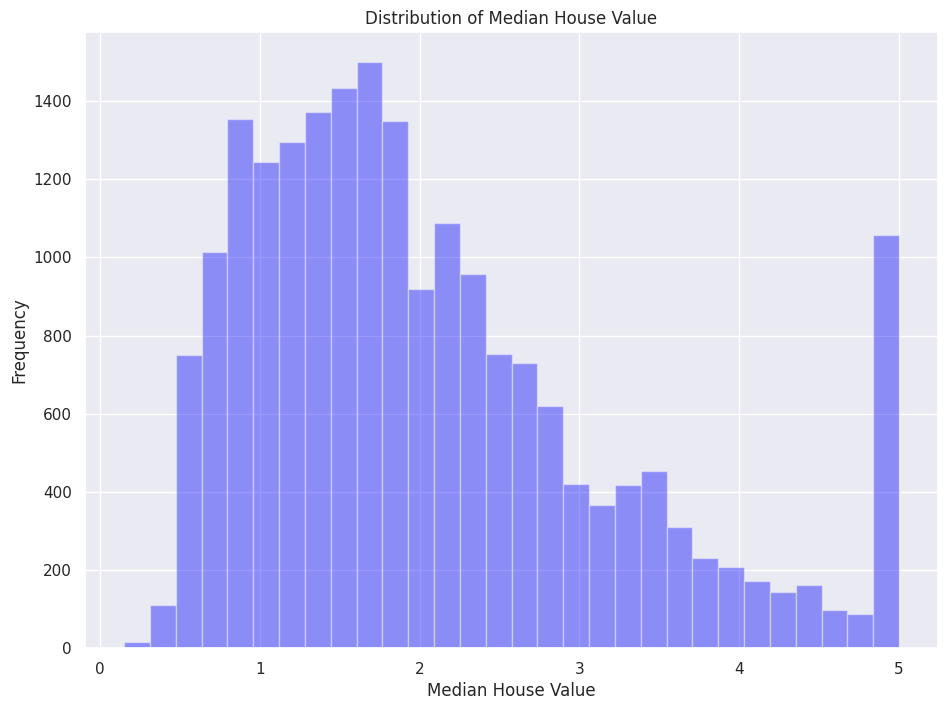

In [5]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt
housing_data = fetch_california_housing()
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['MEDV'] = housing_data.target
sns.set(rc={'figure.figsize':(11, 8)})
sns.distplot(df['MEDV'], bins=30, kde=False, color='blue')
plt.title('Distribution of Median House Value')
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.show()

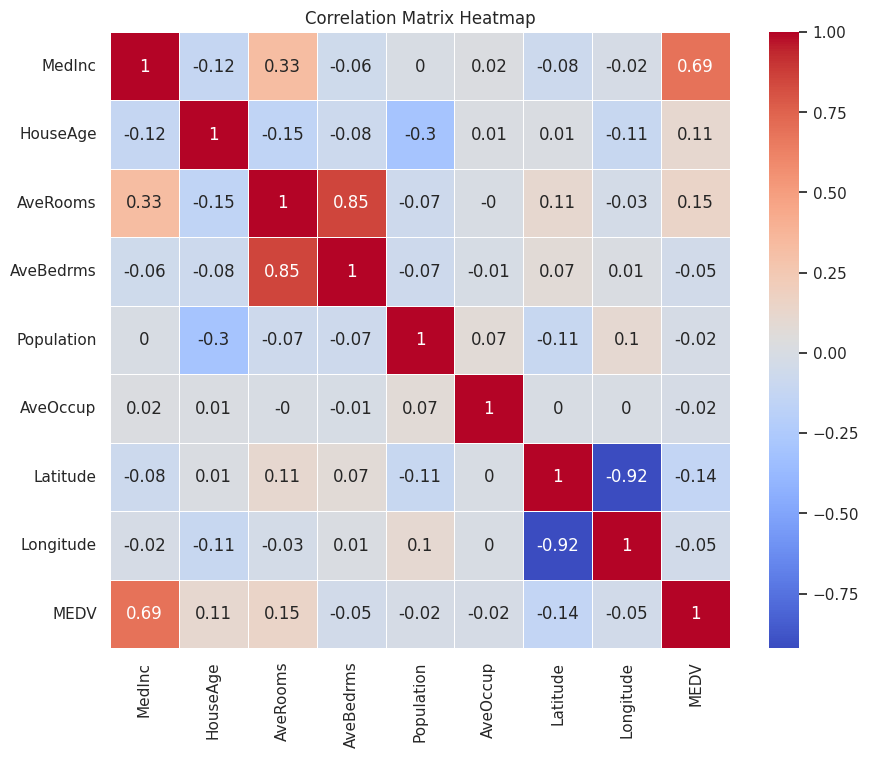

In [6]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import seaborn as sns
import matplotlib.pyplot as plt
housing_data = fetch_california_housing()
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['MEDV'] = housing_data.target
correlation_matrix = df.corr().round(2)
sns.set(rc={'figure.figsize':(10, 8)})
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

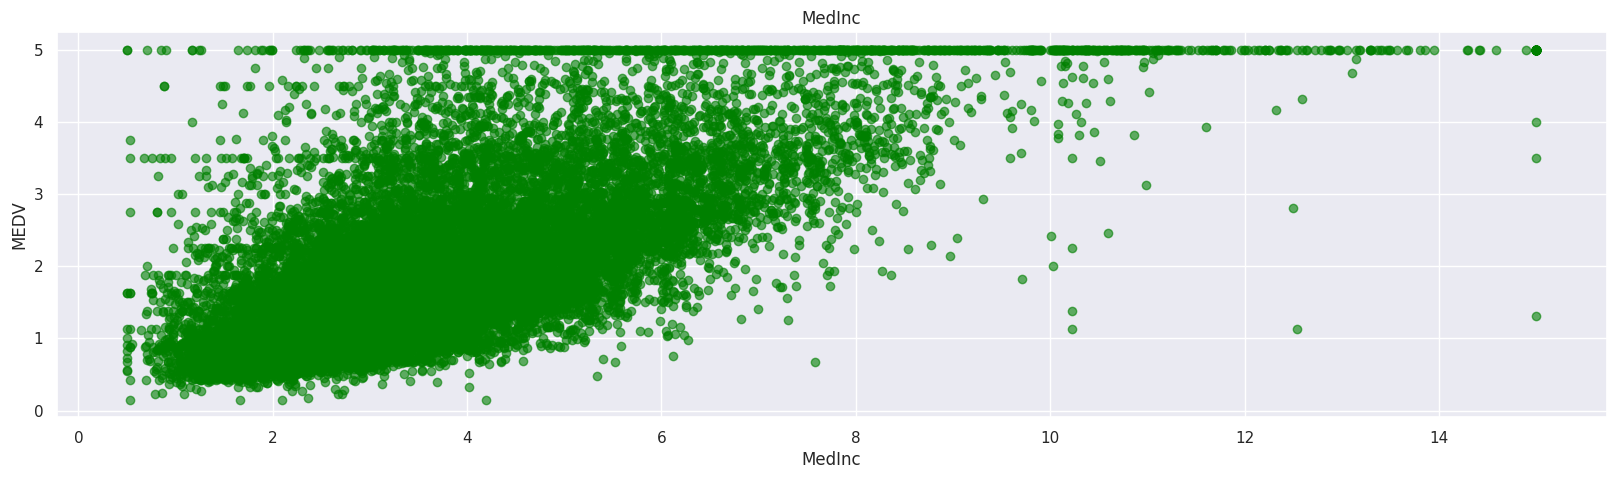

In [18]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
housing_data = fetch_california_housing()
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['MEDV'] = housing_data.target
plt.figure(figsize=(20, 5))
features = ['MedInc']
target = df['MEDV']
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    house_features = df[col]
    target_price = target
    plt.scatter(house_features, target_price, marker='o', color='green', alpha=0.6)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
plt.show()


In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['MEDV'] = housing_data.target
features = ['MedInc']
target = 'MEDV'
x_ex = df[features]
y_ex = df[target]
x_ex_train, x_ex_test, y_ex_train, y_ex_test = train_test_split(x_ex, y_ex, test_size=0.2, random_state=42)
lin_model = LinearRegression()
lin_model.fit(x_ex_train, y_ex_train)
y_ex_train_predict = lin_model.predict(x_ex_train)
rmse_train = np.sqrt(metrics.mean_squared_error(y_ex_train, y_ex_train_predict))
r2_train = metrics.r2_score(y_ex_train, y_ex_train_predict)
print("The model performance for the training set")
print("--------------------------------------")
print('RMSE is {}\n'.format(rmse_train))
print('R^2 score is {}\n'.format(r2_train))
y_ex_test_predict = lin_model.predict(x_ex_test)
rmse_test = np.sqrt(metrics.mean_squared_error(y_ex_test, y_ex_test_predict))
r2_test = metrics.r2_score(y_ex_test, y_ex_test_predict)
print("Model performance for the testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse_test))
print('R^2 score is {}'.format(r2_test))


The model performance for the training set
--------------------------------------
RMSE is 0.8361487409655547

R^2 score is 0.47699273458205227

Model performance for the testing set
--------------------------------------
RMSE is 0.8420901241414455
R^2 score is 0.45885918903846656
